In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score, precision_score, recall_score

In [22]:
df=pd.read_csv('musk_csv.csv')

In [53]:
df.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


In [56]:
df.isna().sum() #checking missing values

ID                   0
molecule_name        0
conformation_name    0
f1                   0
f2                   0
f3                   0
f4                   0
f5                   0
f6                   0
f7                   0
f8                   0
f9                   0
f10                  0
f11                  0
f12                  0
f13                  0
f14                  0
f15                  0
f16                  0
f17                  0
f18                  0
f19                  0
f20                  0
f21                  0
f22                  0
f23                  0
f24                  0
f25                  0
f26                  0
f27                  0
                    ..
f138                 0
f139                 0
f140                 0
f141                 0
f142                 0
f143                 0
f144                 0
f145                 0
f146                 0
f147                 0
f148                 0
f149                 0
f150       

In [58]:
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.92)]

In [60]:
df = df.drop(columns = to_drop)

In [61]:
df.shape 

(6598, 117)

In [63]:
train,test = train_test_split(df, random_state=30, test_size = 0.2)
Xtrain = train.iloc[:,3:-1]
Ytrain = train.iloc[:,-1:]
Xtest = test.iloc[:,3:-1]
Ytest = test.iloc[:,-1:]
Xtrain.shape

(5278, 113)

In [64]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [65]:
a=[1]*Xtrain.shape[0]
Xtrain["demo"]=a
Xtrain.shape

(5278, 114)

In [66]:
b=[1]*Xtest.shape[0]
Xtest["demo"]=b
Xtest.shape

(1320, 114)

In [68]:
x_train=Xtrain.values.reshape(Xtrain.shape[0],19,6,1)
x_test=Xtest.values.reshape(Xtest.shape[0],19,6,1)

In [69]:
x_train.shape

(5278, 19, 6, 1)

In [70]:
x_test.shape

(1320, 19, 6, 1)

In [71]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(19,6,1)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [72]:
model.compile(loss=keras.losses.binary_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [73]:
history = model.fit(x_train,Ytrain,batch_size=128,epochs=17,validation_data=(x_test,Ytest))
score=model.evaluate(x_test,Ytest,verbose=0)
print(score)

Train on 5278 samples, validate on 1320 samples
Epoch 1/17
5278/5278 [==============================] - 91s 17ms/step - loss: 2.5627 - acc: 0.8374 - val_loss: 2.3567 - val_acc: 0.8538
Epoch 2/17
5278/5278 [==============================] - 94s 18ms/step - loss: 2.5265 - acc: 0.8401 - val_loss: 2.3567 - val_acc: 0.8538
Epoch 3/17
5278/5278 [==============================] - 105s 20ms/step - loss: 2.0610 - acc: 0.8448 - val_loss: 1.1357 - val_acc: 0.8970
Epoch 4/17
5278/5278 [==============================] - 95s 18ms/step - loss: 0.7436 - acc: 0.8674 - val_loss: 0.1629 - val_acc: 0.9273
Epoch 5/17
5278/5278 [==============================] - 98s 19ms/step - loss: 0.2579 - acc: 0.9064 - val_loss: 0.1361 - val_acc: 0.9477
Epoch 6/17
5278/5278 [==============================] - 101s 19ms/step - loss: 0.2144 - acc: 0.9174 - val_loss: 0.1332 - val_acc: 0.9455
Epoch 7/17
5278/5278 [==============================] - 98s 19ms/step - loss: 0.1970 - acc: 0.9219 - val_loss: 0.1295 - val_acc: 0.945

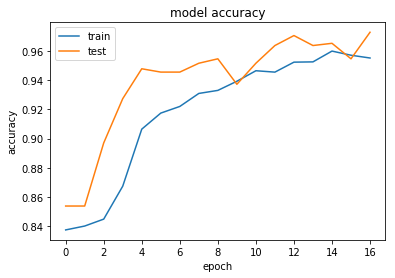

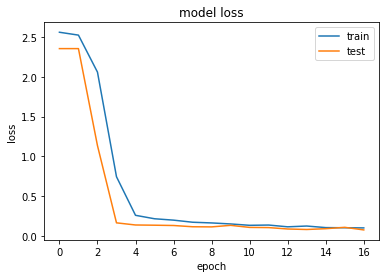

In [74]:
%matplotlib inline

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [75]:
print("f1_score:",f1_score(Ytest,model.predict_classes(x_test),))
print("recall:",recall_score(Ytest,model.predict_classes(x_test),))
print("Validation Loss:",score[0])
print("Validation Accuracy:",score[1])

f1_score: 0.9052631578947369
recall: 0.8911917098445595
Validation Loss: 0.07395315951470173
Validation Accuracy: 0.9727272727272728


In [76]:
model.save('model2.h5')